In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[69]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203,
        254, 252, 252, 252, 214,  51,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

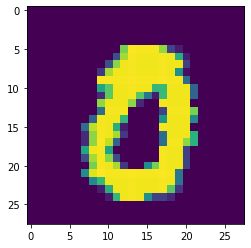

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [15]:
y_example[69]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [20]:
single_image.min()

0

In [22]:
single_image.max()

255

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
scaled_single = x_train[69]

In [25]:
scaled_single.max()

1.0

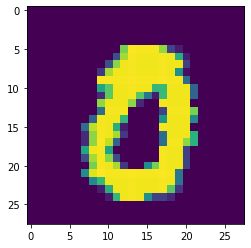

In [26]:
plt.imshow(scaled_single)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test = x_test.reshape(10000,28,28,1)

In [32]:
x_test.shape

(10000, 28, 28, 1)

Train the model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #Last layer = classifier
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1410 - accuracy: 0.9571 - val_loss: 0.0573 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0413 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0419 - val_accuracy: 0.9871


In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
losses = pd.DataFrame(model.history.history)

In [43]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.141030,0.957150,0.057345,0.9825
1,0.046732,0.985767,0.041338,0.9864
2,0.030191,0.990483,0.039240,0.9877
3,0.019782,0.993750,0.045797,0.9857
4,0.013676,0.995817,0.041918,0.9871


<AxesSubplot:>

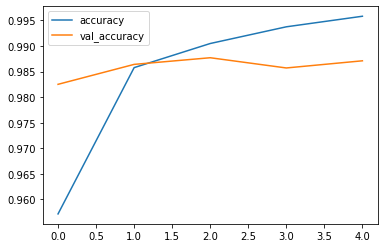

In [44]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

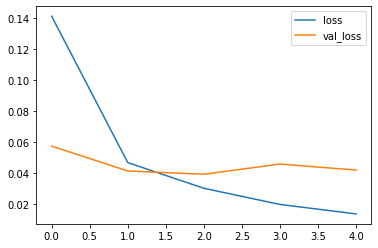

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04191804304718971, 0.9871000051498413]


In [70]:
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [71]:
y_cat_test.shape

(10000, 10)

In [75]:
y_cat_test[50]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [76]:
pred[50]

6

In [65]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [78]:
confusion_matrix(y_test,pred)

array([[ 970,    0,    4,    1,    1,    2,    2,    0,    0,    0],
       [   4, 1125,    1,    0,    0,    0,    3,    0,    2,    0],
       [   0,    2, 1020,    2,    1,    0,    1,    5,    1,    0],
       [   0,    0,    2, 1004,    0,    1,    0,    2,    1,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    0,    3],
       [   1,    0,    0,    7,    0,  881,    3,    0,    0,    0],
       [   3,    1,    1,    0,    3,    1,  947,    0,    2,    0],
       [   0,    1,   10,    1,    3,    0,    0, 1002,    1,   10],
       [   3,    1,    2,    2,    1,    0,    3,    0,  960,    2],
       [   0,    1,    2,    0,   12,    2,    0,    3,    5,  984]],
      dtype=int64)

<AxesSubplot:>

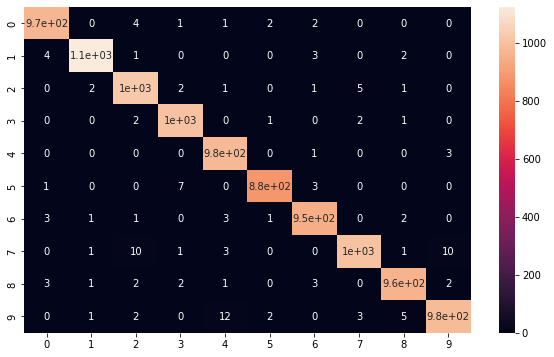

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [92]:
my_number = x_test[90]

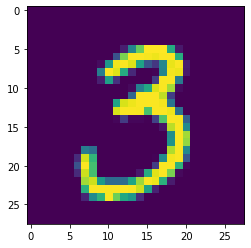

In [93]:
plt.imshow(my_number.reshape(28,28))

In [94]:
mod1=model.predict(my_number.reshape(1,28,28,1))
np.argmax(mod1,axis=1)

1/1 [==============================] - 0s 14ms/step


array([3], dtype=int64)